In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
np.random.seed(1)

%matplotlib inline
X_tr,Y_tr,X_te,Y_te,labels=load_dataset() #The images are in h5 datasets(?????)
TrainingImages=X_tr
TestingImages=X_te

In [40]:
A=np.array([[1,2,3],[4,5,6]])

In [41]:
B=np.array([[1,2,3],[4,5,6]])

In [42]:
print(np.dot(A,B.T))

[[14 32]
 [32 77]]


In [43]:
X_tr=X_tr.reshape(X_tr.shape[0],-1)
X_tr=X_tr.T/255
print("shape of the training dataset: "+str(X_tr.shape))

shape of the training dataset: (12288, 209)


In [44]:
X_tr

array([[0.06666667, 0.76862745, 0.32156863, ..., 0.56078431, 0.08627451,
        0.03137255],
       [0.12156863, 0.75294118, 0.27843137, ..., 0.60784314, 0.09411765,
        0.10980392],
       [0.21960784, 0.74509804, 0.26666667, ..., 0.64705882, 0.09019608,
        0.20784314],
       ...,
       [0.        , 0.32156863, 0.54117647, ..., 0.33333333, 0.01568627,
        0.        ],
       [0.        , 0.31372549, 0.55294118, ..., 0.41960784, 0.01960784,
        0.        ],
       [0.        , 0.31764706, 0.55686275, ..., 0.58431373, 0.        ,
        0.        ]])

In [45]:
ones=0
zeros=0
for i in Y_tr[0,:]:
    if(i):
        ones+=1
    else:
        zeros+=1
print(ones+zeros)

209


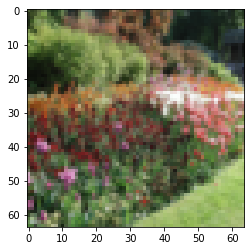

In [46]:
plt.imshow(TrainingImages[101,:,:,:])

In [47]:
m=X_tr.shape[1]

In [48]:
def initialize_random(neural_layers):
    for_dict=dict()
    for i in range(1,len(neural_layers)):
        for_dict["W"+str(i)]=np.random.randn(neural_layers[i],neural_layers[i-1])*0.01
        for_dict["b"+str(i)]=np.zeros((neural_layers[i],1))
    return for_dict

In [49]:
def sigmoid(X):
    return np.divide(1,1+np.exp(-X))

In [50]:
def relu(X):
    return np.maximum(0,X)   

In [51]:
def der_sigmoid(X):
    s=sigmoid(X)
    Z=s*(1-s)
    return Z    

In [52]:
#  def der_tanh(X):

In [53]:
def der_relu(X):
    X[X<=0]=0
    return X

In [55]:
def forward_propagation(X,y,neural_layers,for_dict):
    for i in range(1,len(neural_layers)):
        if(i==1):
            for_dict["Z"+str(i)]=np.dot(for_dict["W"+str(i)],X)+for_dict["b"+str(i)]
        else:
            for_dict["Z"+str(i)]=np.dot(for_dict["W"+str(i)],for_dict["A"+str(i-1)])+for_dict["b"+str(i)]
        abc=for_dict["Non_linear"+str(i)]
        if(abc=="sigmoid"):
            for_dict["A"+str(i)]=sigmoid(for_dict["Z"+str(i)])
        elif(abc=="relu"):
            for_dict["A"+str(i)]=relu(for_dict["Z"+str(i)])
        elif(abc=="tanh"):
            for_dict["A"+str(i)]=np.tanh(for_dict["Z"+str(i)])
    cost1=(-1)*(np.multiply(y,np.log(for_dict["A"+str(len(neural_layers)-1)]))+np.multiply((1-y),np.log(1-for_dict["A"+str(len(neural_layers)-1)])))
    cost=(1/m)*cost1.sum()
    return for_dict,cost   

In [56]:
def forward_propagatio(X,y,neural_layers,for_dict):
    for i in range(1,len(neural_layers)):
        if(i==1):
            for_dict["Z"+str(i)]=np.dot(for_dict["W"+str(i)],X)+for_dict["b"+str(i)]
        else:
            for_dict["Z"+str(i)]=np.dot(for_dict["W"+str(i)],for_dict["A"+str(i-1)])+for_dict["b"+str(i)]
        abc=for_dict["Non_linear"+str(i)]
        for_dict["A"+str(i)]=sigmoid(for_dict["Z"+str(i)])
    cost=(-1)*np.sum(np.multiply(y,np.log(for_dict["A"+str(len(neural_layers)-1)]))+np.multiply((1-y),np.log(1-for_dict["A"+str(len(neural_layers)-1)])),axis=1)/X.shape[1]
    return for_dict,cost   

In [57]:
def forward_propagatio(X,y,neural_layers,for_dict):
    for i in range(1,len(neural_layers)):
        W=for_dict["W"+str(i)]
        b=for_dict["b"+str(i)]
        for_dict["Z"+str(i)]=np.dot(W,X)+b
        abc=for_dict["Non_linear"+str(i)]
        if(abc=="sigmoid"):
            for_dict["A"+str(i)]=sigmoid(for_dict["Z"+str(i)])
        elif(abc=="relu"):
            for_dict["A"+str(i)]=relu(for_dict["Z"+str(i)])
        elif(abc=="tanh"):
            for_dict["A"+str(i)]=np.tanh(for_dict["Z"+str(i)])
        X=for_dict["A"+str(i-1)]
    cost1=(-1/m)*(np.multiply(y,np.log(X))+np.multiply((1-y),np.log(1-X)))
    cost=cost1.sum()
    return for_dict,cost

In [58]:
def back_propagatio(X,y,layers,for_dict,back_dict):
    m=X.shape[1]
    n=len(layers)-1
    for i in range(n,0,-1):
        abc=for_dict["Non_linear"+str(i)]
        if(i==n):
            back_dict["dZ"+str(i)]=for_dict["A"+str(i)]-y
        else:
            if(abc=="sigmoid"):
                back_dict["dZ"+str(i)]=np.dot(for_dict("W"+str(i+1)).T,back_dict("dZ"+str(i+1)))*der_sigmoid(for_dict("Z"+str(i)))
            elif(abc=="relu"):
                back_dict["dZ"+str(i)]=np.dot(for_dict("W"+str(i+1)).T,back_dict("dZ"+str(i+1)))*der_relu(for_dict("Z"+str(i)))
            elif(abc=="tanh"):
                back_dict["dZ"+str(i)]=np.dot(for_dict("W"+str(i+1)).T,back_dict("dZ"+str(i+1)))*der_sigmoid(for_dict("Z"+str(i)))
        if(i==1):
            back_dict["dW"+str(i)]=np.dot(back_dict["dZ"+str(i)],X.T)/m
        else:
            back_dict["dW"+str(i)]=np.dot(back_dict["dZ"+str(i)],for_dict["A"+str(n-1)].T)/m
        back_dict["db"+str(i)]=np.sum(back_dict["dZ"+str(i)],axis=1,keepdims=True)/m  
    return back_dict

In [59]:
def back_propagatio(X,y,layers,for_dict,back_dict):
    m=X.shape[1]
    n=len(layers)-1
    for i in range(n,0,-1):
        abc=for_dict["Non_linear"+str(i)]
        if(i==n):
            back_dict["dZ"+str(i)]=for_dict["A"+str(i)]-y
        else:
            if(abc=="sigmoid"):
                back_dict["dZ"+str(i)]=np.multiply(np.dot(for_dict["W"+str(i+1)].T,back_dict["dZ"+str(i+1)]),der_sigmoid(for_dict["Z"+str(i)]))   
            elif(abc=="relu"):
                back_dict["dZ"+str(i)]=np.multiply(np.dot(for_dict["W"+str(i+1)].T,back_dict["dZ"+str(i+1)]),der_relu(for_dict["Z"+str(i)]))  
        if(i==1):
            back_dict["dW"+str(i)]=np.dot(back_dict["dZ"+str(i)],X.T)/m
        else:
            back_dict["dW"+str(i)]=(1/m)*np.dot(back_dict["dZ"+str(i)],for_dict["A"+str(i-1)].T)
        back_dict["db"+str(i)]=(1/m)*np.sum(back_dict["dZ"+str(i)],axis=1,keepdims=True)
    return back_dict,for_dict

In [60]:
def backprop(X,y,layers,for_dict,back_dict):
    m=X.shape[1]
    n=len(layers)-1
    back_dict["dZ"+str(n)]=for_dict["A"+str(n)]-y
    back_dict["dW"+str(n)]=(1/m)*np.dot(back_dict["dZ"+str(n)],for_dict["A"+str(n-1)].T)
    back_dict["db"+str(n)]=(1/m)*np.sum(back_dict["dZ"+str(n)],axis=1,keepdims=True)
    back_dict["dZ"+str(n-1)]=np.multiply(np.dot(for_dict["W"+str(n)].T,back_dict["dZ"+str(n)]),der_sigmoid(for_dict["Z"+str(n-1)]))
    back_dict["dW"+str(n-1)]=(1/m)*np.dot(back_dict["dZ"+str(n-1)],X.T)
    back_dict["db"+str(n-1)]=(1/m)*np.sum(back_dict["dZ"+str(n-1)],axis=1,keepdims=True)
    return back_dict,for_dict

In [61]:
def back_propagation(X,y,layers,for_dict,back_dict):
    m=X.shape[1]
    n=len(layers)-1
    back_dict["dZ"+str(n)]=for_dict["A"+str(n)]-y
    back_dict["dW"+str(n)]=(1/m)*np.dot(back_dict["dZ"+str(n)],for_dict["A"+str(n-1)].T)
    back_dict["db"+str(n)]=(1/m)*np.sum(back_dict["dZ"+str(n)],axis=1,keepdims=True)
    back_dict["dZ"+str(n-1)]=np.multiply(np.dot(for_dict["W"+str(n)].T,back_dict["dZ"+str(n)]),der_sigmoid(for_dict["Z"+str(n-1)]))
    back_dict["dW"+str(n-1)]=(1/m)*np.dot(back_dict["dZ"+str(n-1)],for_dict["A"+str(n-2)].T)
    back_dict["db"+str(n-1)]=(1/m)*np.sum(back_dict["dZ"+str(n-1)],axis=1,keepdims=True)
    for i in range(n-2,1,-1):      
        back_dict["dZ"+str(i)]=np.multiply(np.dot(for_dict["W"+str(i+1)].T,back_dict["dZ"+str(i+1)]),der_relu(for_dict["Z"+str(i)]))  
        back_dict["dW"+str(i)]=(1/m)*np.dot(back_dict["dZ"+str(i)],for_dict["A"+str(i-1)].T)
        back_dict["db"+str(i)]=(1/m)*np.sum(back_dict["dZ"+str(i)],axis=1,keepdims=True)
    back_dict["dZ"+str(1)]=np.multiply(np.dot(for_dict["W"+str(2)].T,back_dict["dZ"+str(2)]),der_relu(for_dict["Z"+str(1)])) 
    back_dict["dW"+str(1)]=np.dot(back_dict["dZ"+str(1)],X.T)/m
    back_dict["db"+str(1)]=(1/m)*np.sum(back_dict["dZ"+str(1)],axis=1,keepdims=True)
    return back_dict,for_dict

In [62]:
def back_propagatio(X,y,layers,for_dict,back_dict):
    m=X.shape[1]
    n=len(layers)-1
    for i in range(n,0,-1):
        abc=for_dict["Non_linear"+str(i)]
        if(i==n):
            back_dict["dZ"+str(i)]=for_dict["A"+str(i)]-y
        else:
            back_dict["dZ"+str(i)]=np.multiply(np.dot(for_dict["W"+str(i+1)].T,back_dict["dZ"+str(i+1)]),der_sigmoid(for_dict["Z"+str(i)]))   
        if(i==1):
            back_dict["dW"+str(i)]=np.dot(back_dict["dZ"+str(i)],X.T)/m
        else:
            back_dict["dW"+str(i)]=(1/m)*np.dot(back_dict["dZ"+str(i)],for_dict["A"+str(i-1)].T)
        back_dict["db"+str(i)]=(1/m)*np.sum(back_dict["dZ"+str(i)],axis=1,keepdims=True)/m  
    return back_dict,for_dict

In [63]:
for i in range(5,1,-1):
    print(i)

5
4
3
2


In [64]:
def model(X,y,neural_layers,alpha,iterations):
    for_dict=initialize_random(neural_layers)
    #check for_dict weights dimensions
   # for i in range(1,len(neural_layers)):
    #    assert(for_dict["W"+str(i)].shape==(neural_layers[i],neural_layers[i-1]))
     #   assert(for_dict["b"+str(i)].shape==(neural_layers[i],1)
               
    for i in range(1,len(neural_layers)):
        if(i==(len(neural_layers)-1)):
            for_dict["Non_linear"+str(i)]="sigmoid"
        else:
            for_dict["Non_linear"+str(i)]="relu"
    rec_cost=[]
    back_dict=dict()
    for i in range(iterations):
        for_dict,cost=forward_propagation(X,y,neural_layers,for_dict)
        #rec_cost.append(cost)
        if(i%100==0):
            rec_cost.append(cost)
        back_dict,for_dict=back_propagation(X,y,neural_layers,for_dict,back_dict)
        for i in range(1,len(neural_layers)):
            for_dict["W"+str(i)]=for_dict["W"+str(i)]-alpha*back_dict["dW"+str(i)]
            for_dict["b"+str(i)]=for_dict["b"+str(i)]-alpha*back_dict["db"+str(i)]
    return for_dict,rec_cost

In [65]:
def model2(X,y,neural_layers,alpha,iterations):
    for_dict=initialize_random(neural_layers)
    for i in range(1,len(neural_layers)):
        if(i==(len(neural_layers)-1)):
            for_dict["Non_linear"+str(i)]="sigmoid"
        else:
            for_dict["Non_linear"+str(i)]="relu"
    rec_cost=[]
    back_dict=dict()
    for i in range(iterations):
        for_dict,cost=forward_propagation(X,y,neural_layers,for_dict)
        #rec_cost.append(cost)
        if(i%100==0):
            rec_cost.append(cost)
        back_dict,for_dict=backprop(X,y,neural_layers,for_dict,back_dict)
        for i in range(1,len(neural_layers)):
            for_dict["W"+str(i)]=for_dict["W"+str(i)]-alpha*back_dict["dW"+str(i)]
            for_dict["b"+str(i)]=for_dict["b"+str(i)]-alpha*back_dict["db"+str(i)]
    return for_dict,rec_cost

In [66]:
layers=3
neural_layers=[X_tr.shape[0],7,1]

In [67]:
neural_layers

[12288, 7, 1]

In [68]:
for_dict,costs=model2(X_tr,Y_tr,neural_layers,0.0075,2500)

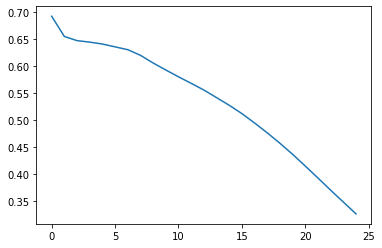

In [69]:
plt.plot(np.squeeze(costs))

In [70]:
costs

[0.693049735659989,
 0.6555548404137356,
 0.6477885858276597,
 0.6450583399200012,
 0.6414830123019537,
 0.6362613901604667,
 0.6310129593634435,
 0.6205949112725753,
 0.6063017626258435,
 0.5933591065349926,
 0.5807075939419095,
 0.5685962380906929,
 0.5561849825189249,
 0.5421286627107589,
 0.5279113002887121,
 0.5124702839322652,
 0.49504169866601516,
 0.47675520594758247,
 0.4574114164999874,
 0.4369131543439069,
 0.41507960242251907,
 0.39292011635369334,
 0.3703214926027222,
 0.3483284272052221,
 0.3263621392995966]

In [71]:
import tensorflow as tf

In [72]:
coefficients=np.array([[1.],[-10.],[25.]])

w=tf.Variable(0,dtype=tf.float32)
x=tf.placeholder(tf.float32,[3,1])
#cost=tf.add(tf.add(w**2,tf.multiply(-10.,w)),25)
cost=x[0][0]*w**2+x[1][0]*w+x[2][0]
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
init=tf.global_variables_initializer()
session=tf.Session()
session.run(init)
print(session.run(w))

AttributeError: module 'tensorflow' has no attribute 'placeholder'